# MOP Cooling Magnetic Field Calculation

In [1]:
%matplotlib inline
import sympy as sp
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

## One Coil Multi-windings

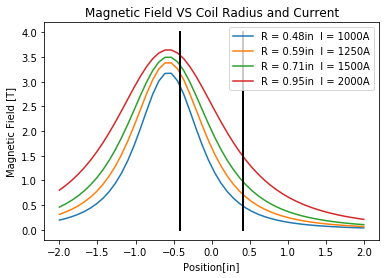

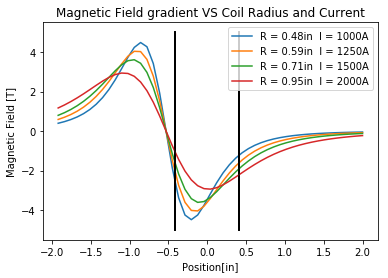

In [2]:
inch = 0.0254
R = [x * inch for x in [0.48, 0.59, 0.71, 0.95]]
I = [1000, 1250, 1500, 2000] 
d = 0.41 * inch
d_wire = 0.032 * inch
layers = 8
columns = 10
u0 = 4 * np.pi * 1e-7
pos = np.linspace(-2, 2, 50) * inch

for i in range(0,len(R)):
    curr = I[i]
    r0 = R[i]
    b0 = np.zeros(len(pos))
    for col in range(0, columns):
        z = -d - col * d_wire  - d_wire / 2 
        for l in range(0, layers):
            r = r0 + l * d_wire + d_wire / 2 
            b0 = b0 + (u0 * curr * r**2 / 2 ) / ((r**2 + (pos - z)**2)**(3.0/2.0)) 
    # Plot field 
    plt.figure(1)
    plt.plot(pos/ inch, b0, '-', label = 'R = ' + str(r0 / inch) + 'in  I = ' + str(curr)+'A')
    plt.plot([-d / inch, -d / inch], [0, 4], 'k-')
    plt.plot([d / inch, d / inch], [0, 4], 'k-')
    # Plot gradient
    plt.figure(2)
    plt.plot(pos[1:]/ inch, (b0[1:] - b0[:-1])/ (4.0/50), '-', label = 'R = ' + str(r0 / inch) + 'in  I = ' + str(curr)+'A')
    plt.plot([-d / inch, -d / inch], [-5, 5], 'k-')
    plt.plot([d / inch, d / inch], [-5, 5], 'k-')
    
plt.figure(1)
plt.xlabel('Position[in]')
plt.ylabel('Magnetic Field [T]')
plt.title('Magnetic Field VS Coil Radius and Current')
plt.legend()


plt.figure(2)
plt.xlabel('Position[in]')
plt.ylabel('Magnetic Field [T]')
plt.title('Magnetic Field gradient VS Coil Radius and Current')
plt.legend()
plt.axis('tight')

plt.show()
plt.close()


## Two Coils Multi-windings Anti-helmholtz

In [ ]:
inch = 0.00254
R0 = 1 * inch
I = 200
zA = 0.946 * R0
zB = -0.582 * R0 
rA = 0.324 * R0
rB = 0.813 * R0

d_wire = 0.032 * inch
layers = 8
columns = 10
u0 = 4 * np.pi * 1e-7
pos = np.linspace(-R0, R0, 50)

b0 = np.zeros(len(pos))
for i in range(0,2):
    if i == 0: 
        z0 = zA
        r0 = rA
        curr = I
    if i == 1:
        z0 = zB
        r0 = rB
        curr = -I
    for col in range(0, columns):
        z = z0 - col * d_wire  - d_wire / 2 #Not exactly accurate
        for l in range(0, layers):
            r = r0 + l * d_wire + d_wire / 2 
            b0 = b0 +  (u0 * curr * r**2 / 2 ) / ((r**2 + (pos - z)**2)**(3.0/2.0))
# Plot field 
plt.figure(1)
plt.plot(pos/ inch, b0, '-')

# Plot gradient
plt.figure(2)
plt.plot(pos[1:]/ inch, (b0[1:] - b0[:-1])/ (2*R0 / len(pos)), '-')

plt.figure(1)
plt.xlabel('Position[in]')
plt.ylabel('Magnetic Field [T]')
plt.title("Magnetic Field two coils")

plt.figure(2)
plt.xlabel('Position[in]')
plt.ylabel('Magnetic Field [T]')
plt.title('Magnetic Field Gradient')


plt.show()
plt.close()